In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from sklearn import preprocessing
import datetime
from datetime import date

/home/sean/anaconda3/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [2]:
games = pd.read_csv('nfl_games.csv')
games = games.dropna()
games.head()

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1
0,1920-09-26,1920,0,0,RII,STP,1503.947,1300.000,0.824651,48,0,1.0
1,1920-10-03,1920,0,0,AKR,WHE,1503.420,1300.000,0.824212,43,0,1.0
2,1920-10-03,1920,0,0,RCH,ABU,1503.420,1300.000,0.824212,10,0,1.0
3,1920-10-03,1920,0,0,DAY,COL,1493.002,1504.908,0.575819,14,0,1.0
4,1920-10-03,1920,0,0,RII,MUN,1516.108,1478.004,0.644171,45,0,1.0


## Brief view of data

In [5]:
# Generate time feature
games["date"] = pd.to_datetime(games["date"]).dt.strftime("%Y%m%d").astype(int)
games['year'] = (games['date']/10000).astype(int)
games['month'] = ((games['date']%10000)/100).astype(int)
games['day'] = (games['date']%100).astype(int)
games.head()

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1,year,month,day
0,19200926,1920,0,0,RII,STP,1503.947,1300.000,0.824651,48,0,1.0,1920,9,26
1,19201003,1920,0,0,AKR,WHE,1503.420,1300.000,0.824212,43,0,1.0,1920,10,3
2,19201003,1920,0,0,RCH,ABU,1503.420,1300.000,0.824212,10,0,1.0,1920,10,3
3,19201003,1920,0,0,DAY,COL,1493.002,1504.908,0.575819,14,0,1.0,1920,10,3
4,19201003,1920,0,0,RII,MUN,1516.108,1478.004,0.644171,45,0,1.0,1920,10,3


## Visualization

No handles with labels found to put in legend.
No handles with labels found to put in legend.


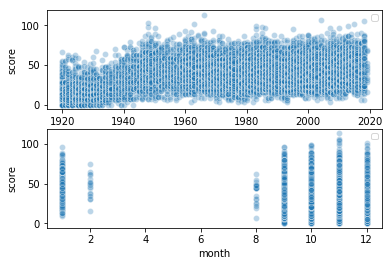

In [6]:
games['score'] = games['score1'] + games['score2']
plt.subplot(2,1,1)
sns.scatterplot(x="year", y="score", data=games, alpha=0.3)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.subplot(2,1,2)
sns.scatterplot(x="month", y="score", data=games, alpha=0.3)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

#### Conclusion 1
+ The total score increase by time which indicate that players were better and better after this game showed up.
+ Miss game data on Mar, Apr, May, June, July, few data on Feb and Aug.
---

In [7]:
# Generate average score per game for each team 
avgscore = []
for i in np.unique(games[['team1','team2']].values):
    s1 = games.loc[games['team1'] == i].score1
    s2 = games.loc[games['team2'] == i].score2
    avgscore.append((s1.sum() + s2.sum()) / (s1.shape[0] + s2.shape[0]))
df_avgscore = pd.DataFrame({'team': np.unique(games[['team1','team2']].values), 'avgscore': avgscore})
print(df_avgscore.dtypes)
df_avgscore.head()

avgscore    float64
team         object
dtype: object


,avgscore,team
0,0.000000,ABU
1,9.640625,AKR
2,17.798817,ARI
3,20.088095,ATL
4,6.666667,ATN


In [8]:
# Generate # of games for each team 
gameCount = []
for i in np.unique(games[['team1','team2']].values):
    n1 = games.loc[games['team1'] == i].shape[0]
    n2 = games.loc[games['team2'] == i].shape[0]
    gameCount.append(n1 + n2)
df_gameCount = pd.DataFrame({'team': np.unique(games[['team1','team2']].values), 'gameCount': gameCount})
print(df_gameCount.dtypes)
df_gameCount.head()

gameCount     int64
team         object
dtype: object


,gameCount,team
0,2,ABU
1,64,AKR
2,1352,ARI
3,840,ATL
4,3,ATN


In [9]:
#Merge two dataframe to get the information of each team
df_team = df_avgscore.merge(df_gameCount, how='inner', left_on='team', right_on='team')
df_team.head()

,avgscore,team,gameCount
0,0.000000,ABU,2
1,9.640625,AKR,64
2,17.798817,ARI,1352
3,20.088095,ATL,840
4,6.666667,ATN,3


In [34]:
#Generate three dataframes by number of games the team plays
team50 = (df_team.loc[df_team['gameCount'] <= 50])
team100 = (df_team.loc[(df_team['gameCount'] <= 100) & (df_team['gameCount'] > 50)])
team150 = (df_team.loc[df_team['gameCount'] > 100])

In [33]:
team100.head()

,avgscore,team,gameCount
1,9.640625,AKR,64
6,21.421053,BBA,57
7,17.018868,BCL,53
9,10.247191,BFF,89
13,13.381818,BYK,55


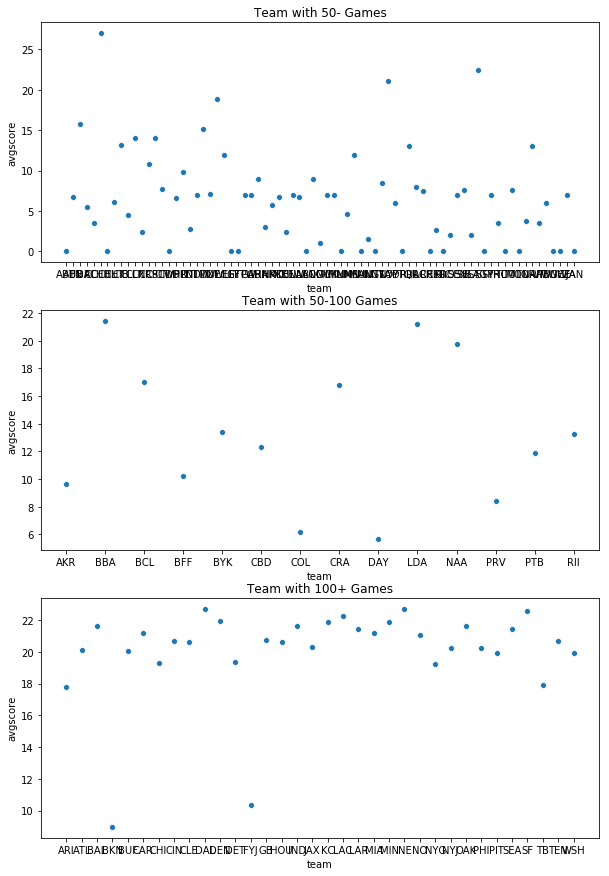

In [25]:
plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
plt.title('Team with 50- Games')
sns.scatterplot(x='team', y='avgscore', data=team50)
plt.subplot(3,1,2)
plt.title('Team with 50-100 Games')
sns.scatterplot(x='team', y='avgscore', data=team100)
plt.subplot(3,1,3)
plt.title('Team with 100+ Games')
sns.scatterplot(x='team', y='avgscore', data=team150)
plt.show()

#### Conclusion 2
+ Basically more games the team play, the higher avgscore the team get
+ Which means better team can play more rounds games.
---

In [26]:
#Generate DataFrame with game data after 2000
games2000 = (games.loc[games.year >= 2000])
games2000.head()

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1,year,month,day,score
11191,20000102,1999,0,0,WSH,MIA,1523.221,1530.353,0.582517,21,10,1.0,2000,1,2,31
11192,20000102,1999,0,0,DAL,NYG,1509.415,1450.987,0.670514,26,18,1.0,2000,1,2,44
11193,20000102,1999,0,0,GB,ARI,1537.004,1404.335,0.757289,49,24,1.0,2000,1,2,73
11194,20000102,1999,0,0,KC,OAK,1562.211,1522.773,0.645929,38,41,0.0,2000,1,2,79
11195,20000102,1999,0,0,MIN,DET,1656.238,1468.918,0.810378,24,17,1.0,2000,1,2,41


In [30]:
# Make a dataframe for each team's score trend for 20 years
TeamTrend = pd.DataFrame(index=np.unique(games2000[['team1', 'team2']].values), columns=np.unique(games2000['year'].values))
TeamTrend.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
ARI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ATL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BUF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
for team in np.unique(games2000[['team1','team2']].values):
    tmp  = []
    for year in np.unique(games2000['year'].values):
        s1 = games2000.loc[(games2000['year'] == year)&(games2000['team1'] == team)][['score1','score2']]
        tmp1 = s1['score1'] - s1['score2']
        s2 = games2000.loc[(games2000['year'] == year)&(games2000['team2'] == team)][['score1','score2']]
        tmp2 = s2['score2'] - s2['score1']
        sumscore = sum(tmp1) + sum(tmp2)
        tmp.append(sumscore)
    TeamTrend.loc[team] = tmp

No handles with labels found to put in legend.


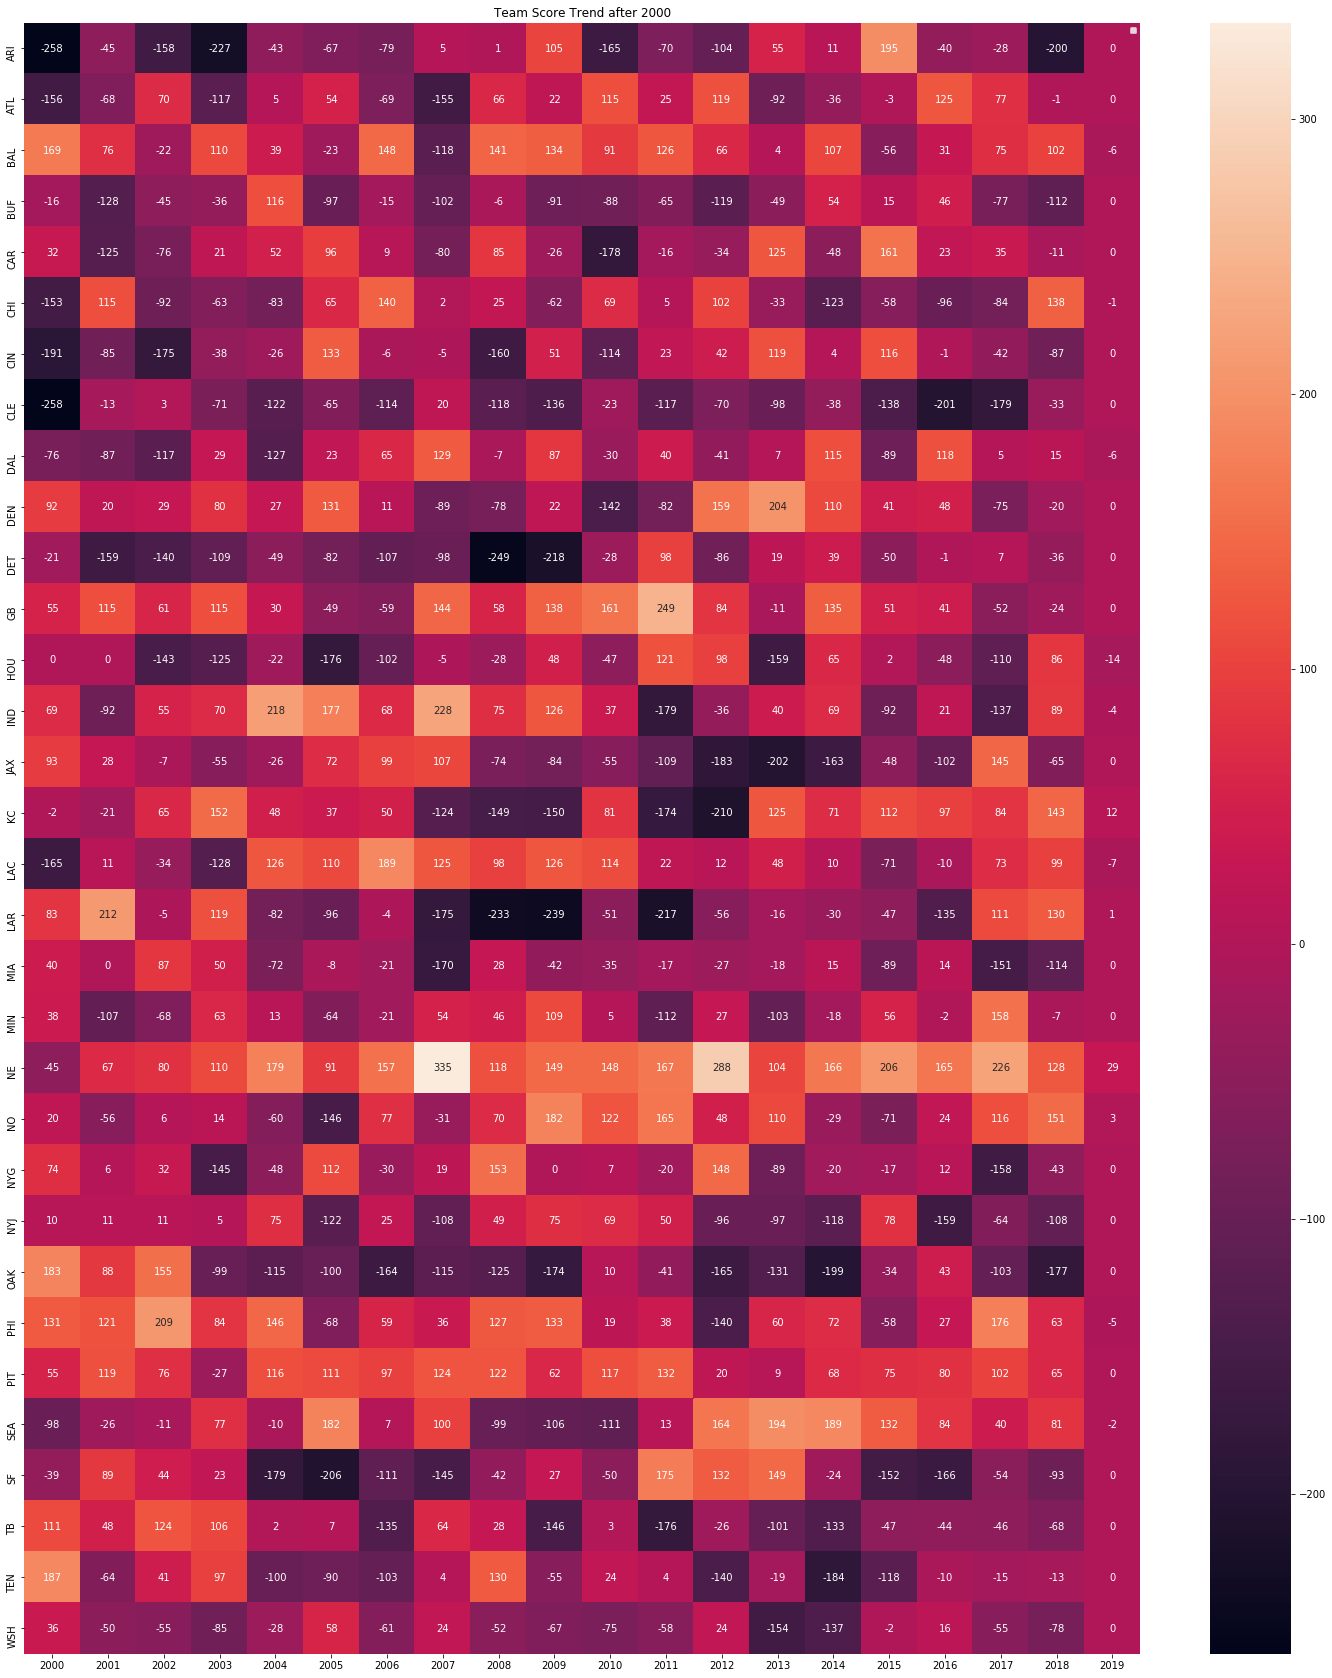

In [41]:
plt.subplots(figsize=(25,30))
sns.heatmap(TeamTrend, annot=True, fmt='d')
plt.title("Team Score Trend after 2000")
plt.show()

#### Conclusion 3
+ No matter home game or away game, the sum of score different with another team represent the power of the team
+ The hight sum is, the more powerful team is
+ The heat map shows the development trend for each team
---